In [ ]:
#Import scikit-learn dataset library
from sklearn import datasets
import pandas as pd
#Load dataset
eeg = pd.read_csv('../dataBinary.csv')
eeg.shape
display(eeg)


,Attention,Meditation,Delta,Theta,Low Alpha,High Alpha,Low Beta,High Beta,Low Gamma,High Gamma,Raw EEG,default
0,43,37,357440,42732,5268,2079,3025,3914,876,1361,218,Cheating
1,57,37,839320,176706,2556,4520,37386,30445,40852,16973,74,Cheating
2,69,56,164652,45361,10721,35913,19317,19875,29101,13804,-4,Cheating
3,81,66,117237,18435,11521,3365,7298,7657,10977,27075,26,Cheating
4,78,78,84716,7332,3740,22837,10646,18890,20207,27605,26,Cheating
...,...,...,...,...,...,...,...,...,...,...,...,...
5749,53,69,21978,7831,14721,6722,10711,2658,1725,26591,-6,NotCheating
5750,64,74,5267,8380,11755,8098,16927,6978,1781,33589,57,NotCheating
5751,70,53,27355,18782,3150,8484,4309,5754,2153,21796,37,NotCheating
5752,66,50,38956,15075,19941,13569,6818,2903,2253,18917,34,NotCheating


In [ ]:
# print the label species(setosa, versicolor,virginica)
print(eeg.default)

# print the names of the four features


0          Cheating
1          Cheating
2          Cheating
3          Cheating
4          Cheating
           ...     
5749    NotCheating
5750    NotCheating
5751    NotCheating
5752    NotCheating
5753    NotCheating
Name: default, Length: 5754, dtype: object


In [ ]:
# Creating a DataFrame 
import pandas as pd
data=eeg
data.head()
print(data)

      Attention   Meditation   Delta   Theta  Low Alpha  High Alpha  Low Beta  \
0             43          37  357440   42732       5268        2079      3025   
1             57          37  839320  176706       2556        4520     37386   
2             69          56  164652   45361      10721       35913     19317   
3             81          66  117237   18435      11521        3365      7298   
4             78          78   84716    7332       3740       22837     10646   
...          ...         ...     ...     ...        ...         ...       ...   
5749          53          69   21978    7831      14721        6722     10711   
5750          64          74    5267    8380      11755        8098     16927   
5751          70          53   27355   18782       3150        8484      4309   
5752          66          50   38956   15075      19941       13569      6818   
5753          64          51  194530   49948      15570        2148      5054   

      High Beta   Low Gamma

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split


X = data.iloc[:, 0:11]
y = data[['default']].values

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

RandomForestClassifier(n_estimators=150)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Accuracy: 0.7411696583671106
(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)


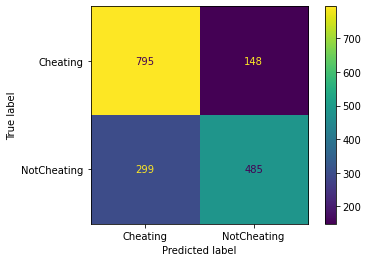

In [ ]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
import inspect
import sklearn

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=150)
print(clf)
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
hyperparams = inspect.signature(clf.__init__)
print(hyperparams) # Do something with them here
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [ ]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, 
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

RandomForestClassifier(min_samples_split=3, n_jobs=1)

In [ ]:
import pandas as pd

X = data.iloc[:, 0:11].values
y = data[['default']].values
labels = ['Attention', 'Meditation', 'Theta', 'Low Alpha','High Alpha','Low Beta','High Beta','Low Gamma','High Gamma','Raw EEG','default']
feature_imp = pd.Series(clf.feature_importances_,index=labels ).sort_values(ascending=False)
feature_imp

Attention     0.109924
Raw EEG       0.100016
Theta         0.098181
Low Gamma     0.095132
High Alpha    0.093039
High Gamma    0.092463
Low Beta      0.088246
Low Alpha     0.083139
High Beta     0.082056
default       0.078991
Meditation    0.078813
dtype: float64

No handles with labels found to put in legend.


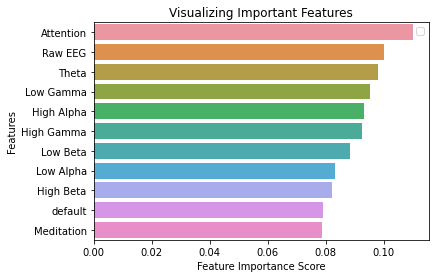

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [ ]:
# Import train_test_split function
from sklearn.model_selection import train_test_split
# Split dataset into features and labels
X=data.iloc[:, 0:10].values  # Removed feature "sepal length"
#labels =data.iloc['Attention', 'Theta', 'Low Alpha','High Alpha','Low Beta','High Beta','Low Gamma','High Gamma','Raw EEG']
#cols =['Attention', 'Theta', 'Low Alpha','High Alpha','Low Beta','High Beta','Low Gamma','High Gamma','Raw EEG']
#print(data)
#X = data[cols]
y=data['default']                                       
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.70, random_state=5) # 70% training and 30% test

In [ ]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# prediction on test set
y_pred=clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))